In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
from IPython.display import display, HTML

### First Step : Loading and Formatting Data
as a quick and dirty approach I decided to use the avg values over time in my first attempt
##### 1. Literacy Data

In [ ]:
literacy = pd.read_csv("input/Teeths/adultliteracy.csv")
#change first columns name
literacy.rename(index = str, columns={"Adult..15...literacy.rate......Total":"Country"}, inplace=True)
#drop rows with no data
literacy.dropna(how="all", subset = list(literacy.columns)[1:], inplace=True)
#take the avg of literacy over time 
literacy["literacy_avg"] = literacy[list(literacy.columns)[1:]].mean(axis=1,skipna = True)
literacy.drop(list(literacy.columns)[1:literacy.shape[1]-1], axis = 1, inplace = True)
literacy.head()

##### 2. Bad Teeth Data

In [ ]:
#Read and Clean Data then merge with bad_teeth

##### 3. GDP Data

In [ ]:
#load GDP data


#take the avg of GDP over time 



##### 4. Health Expenditure Data

In [ ]:
#load healthexpend data

#take the avg of health expenditure over time 



##### 5. Sugar Consumption Data

In [10]:
#load sugar consumption data

#take the avg of sugar consumption over time 


### Second Step : Merging Data and Correlation Inspection

In [1]:
#Bad Teeth seems to be most correlated with literacy_avg
#and literacy is most correlated with gdp and health expenditure
#Surprisingly sugar consumption is not very well correlated with bad teeth
#we may discover a more intiutive relationship between bad teeth and sugar if we look at all data instead of considering the avg.
#build correlation matrix
all_data = badteeth.merge(literacy,on='Country', how = "inner").merge(GDP,on='Country', how = "inner").merge(sugar,on='Country', how = "inner").merge(health,on='Country', how = "inner")
display(all_data.corr(method = "spearman"))
fig = plt.figure()
fig.suptitle("Spearman Corrleation Score = " + str(all_data.corr("spearman").badteeth["literacy_avg"]))
sns.regplot(x="literacy_avg", y="badteeth", data=all_data);

### Third Step : Linear Model
It seems like in case we use the parameter averages the best model to predict bad teeth is:
bad teeth ~ gdp + health + sugar + literacy

,coefficients,features
0,0.019783,literacy_avg
1,0.000038,GDP_avg
2,0.005547,sugar_avg
3,-0.001134,health_avg


'Score for : bad teeth ~ gdp + health + sugar + literacy : 0.200276292794'

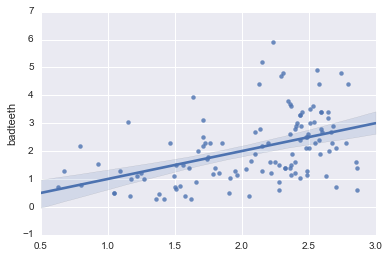

In [14]:
#create a linear regression object
lm = LinearRegression()
#Preapre the feature space
Features = all_data.drop(["badteeth", "Country"], axis = 1)
lm.fit(Features, all_data.badteeth)
display(pd.DataFrame({"features" : Features.columns, "coefficients":lm.coef_}))
#literacy on average seems to be the most important feature for bad teeth prediction
Predictions = lm.predict(Features)
sns.regplot(Predictions, all_data.badteeth)
"Score for : bad teeth ~ gdp + health + sugar + literacy : " + str(lm.score(Features,all_data.badteeth))

'Score for : bad teeth ~  sugar + literacy : 0.168546034687'

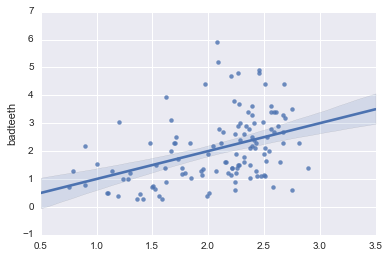

In [15]:
Features = all_data.drop(["badteeth", "Country","GDP_avg","health_avg"], axis = 1)
lm.fit(Features, all_data.badteeth)
Predictions = lm.predict(Features)
sns.regplot(Predictions, all_data.badteeth)
"Score for : bad teeth ~  sugar + literacy : " + str(lm.score(Features,all_data.badteeth))

In [ ]:
#features: bad teeth ~  sugar + literacy + health

### What happens if we use the rate of change (slope) of our time dependent data? 
*Note: I only use the first and last data point for this calculation*

In [34]:
#The function that calculates the rate of change per country
# I called this function for each dataset except badteeth
def find_slopes(file, first_column, column_name):
    #Load and clean the data
    data = pd.read_csv("input/Teeths/" + file)
    data.rename(index = str, columns={first_column:"Country"}, inplace=True)
    data.dropna(how="all", subset = list(data.columns)[1:], inplace=True)
    if file == "sugar_consumption.csv":
        data.drop(["NA..1"], axis = 1, inplace = True)

    if file == "healthexpend.csv":
        columns2discard = ["X2005","X2006","X2007","X2008","X2009", "X2010"] 
        data = data.drop(columns2discard, axis = 1)
    elif file != "sugar_consumption.csv":
        columns2discard = ["X2005","X2006","X2007","X2008","X2009", "X2010","X2011"] 
        data = data.drop(columns2discard, axis = 1)
    
    data_melt = pd.melt(data, id_vars=['Country'], value_vars = list(data.columns)[1:])
    data_melt["variable"] = data_melt["variable"].str.replace("X","").astype(np.int64)
    data_melt.rename(index = str, columns={ "variable": "year"}, inplace = True)
    data_melt = data_melt.dropna()

    #find the earliest and latest (until 2014) entry for each country
    groups = dict(list(data_melt.groupby("Country")))
    earliest = []
    earliest_value = []
    latest = []
    latest_value = []
    for c in groups.keys():
        earliest_year = groups[c].year.min()
        earliest.append(earliest_year) 
        earliest_value.append(float(data_melt[(data_melt.Country == c) & (data_melt.year == earliest_year)].value))
        latest_year = groups[c].year.max()
        latest.append(latest_year)
        latest_value.append(float(data_melt[(data_melt.Country == c) & (data_melt.year == latest_year)].value))
 
    #calculate the rate of change (slope) per country, I only use the first and last data point for this calculation 
    data_slopes = pd.DataFrame({'Country':list(groups.keys()),'min_year' : earliest,'max_year' : latest,'min_value' : earliest_value,'max_value' : latest_value })
    data_slopes[column_name] = (data_slopes.max_value - data_slopes.min_value)/(data_slopes.max_year - data_slopes.min_year)
    data_slopes.sort_values(by=[column_name], ascending=[0], inplace=True)
    data_slopes = data_slopes.dropna()
    return data_slopes

In [2]:
#slope is the ratio between (max_value - min_value)/(latest - earliest year we have data for) 
#output correlation matrix

In [ ]:
#When we check the correlations, we observe that there is a negative correlation between literacy decrease and bad teeth
#this observation is very intiutive
#Moreover we detect a positive correlation between gdp, sugar consumption and health expenditure with bad teeth..

### Linear Model build by rate of change data
Best model is the one we use all parameters

In [ ]:
#create a linear regression object

#Preapre the feature space

#literacy on average seems to be the most important feature for bad teeth prediction


### Fourth Step : Visualization

### The Literacy Data

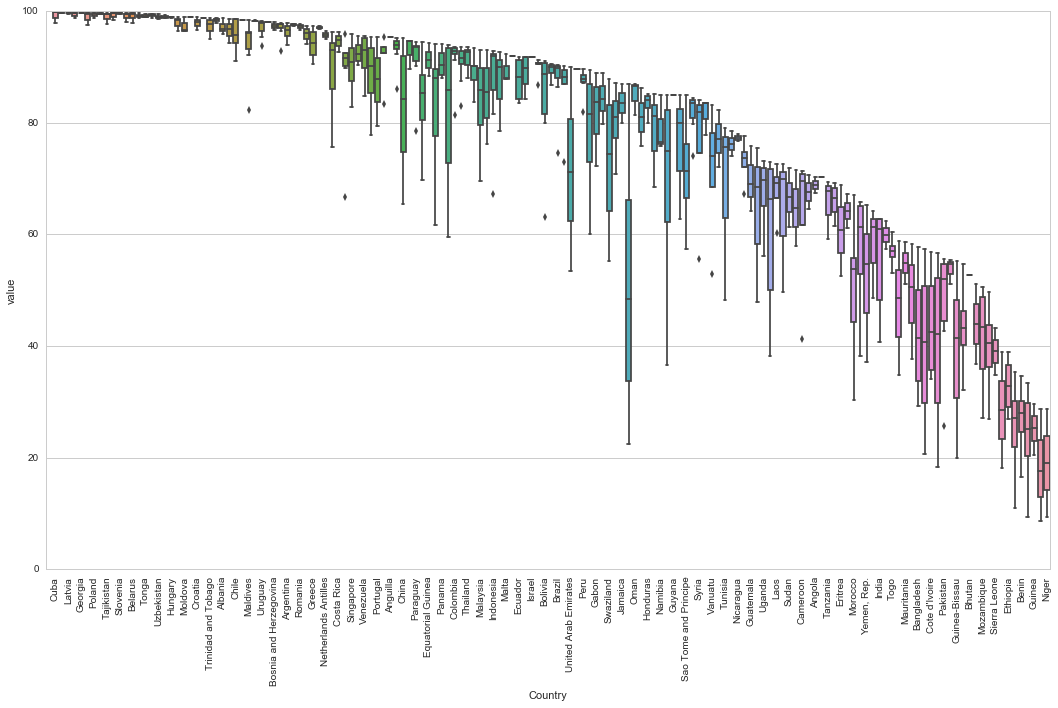

In [39]:
#organizing the rows
literacy = pd.read_csv("input/Teeths/adultliteracy.csv")
literacy.rename(index = str, columns={"Adult..15...literacy.rate......Total":"Country"}, inplace=True)
literacy.dropna(how="all", subset = list(literacy.columns)[1:], inplace=True)
literacy_melt = pd.melt(literacy, id_vars=['Country'], value_vars = list(literacy.columns)[1:])
literacy_melt["variable"] = literacy_melt["variable"].str.replace("X","").astype(np.int64)
#Lets sort the data according to the literacy rate
literacy_melt_sorted = literacy_melt.sort_values(by=['value'], ascending=[0])
g = sns.set_style("whitegrid")
plt.figure(figsize=(18,10))
ax = sns.boxplot(x=literacy_melt_sorted.Country, y=literacy_melt_sorted.value)
plt.setp(ax.get_xticklabels()[::2], visible=False)
g = plt.xticks(rotation=90)

In [40]:
#As Some countries have remained in the same literacy percentage, some encountered a great change during time
#which countries experienced the greatest variance?
#Top ten countries with the greatest variance in literacy
highest_var_countries = literacy_melt.groupby("Country").value.std().sort_values(ascending = False)[0:10]

In [ ]:
#Plot whether they improved or worsened
plot_data = literacy_melt[literacy_melt.Country.isin(list(highest_var_countries.index))].dropna()
plt.figure(figsize=(18,10))
g = sns.FacetGrid(plot_data, col="Country", col_wrap=4, size=3)
g.map(sns.pointplot, "variable", "value", color="purple", ci=None);

### GDP Data

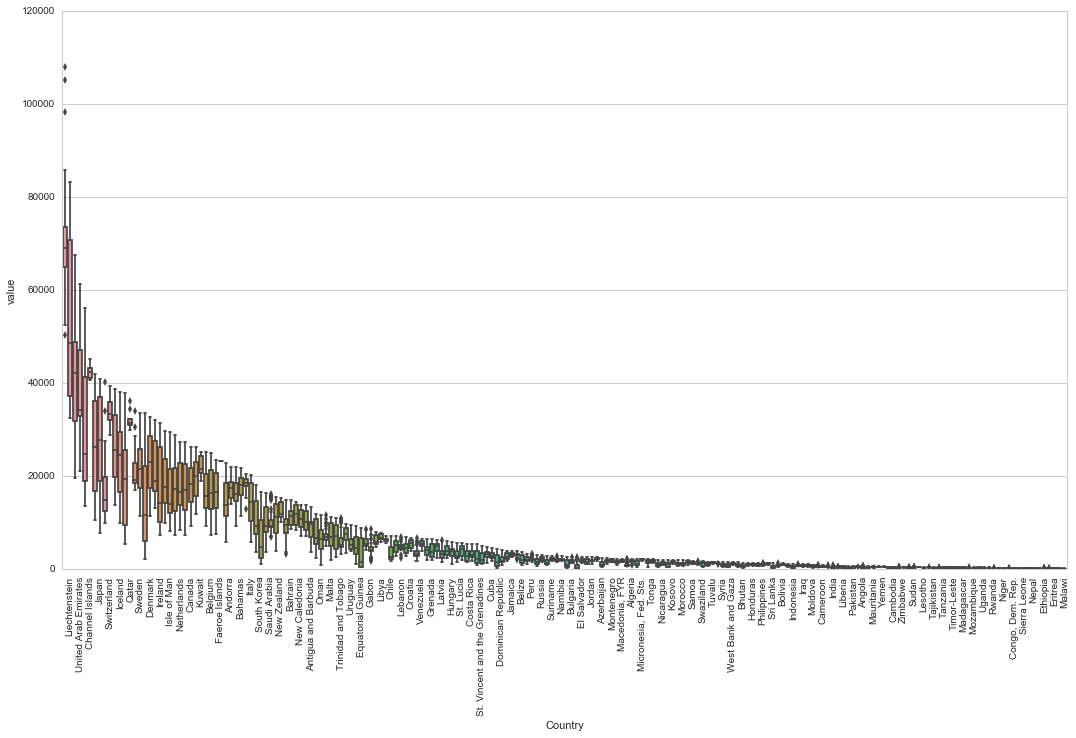

In [41]:
GDP = pd.read_csv("input/Teeths/gdp.csv")
GDP.rename(index = str, columns={"Income.per.person..fixed.2000.US..":"Country"}, inplace=True)
GDP.dropna(how="all", subset = list(GDP.columns)[1:], inplace=True)
GDP_melt = pd.melt(GDP, id_vars=['Country'], value_vars = list(GDP.columns)[1:])
GDP_melt["variable"] = GDP_melt["variable"].str.replace("X","").astype(np.int64)
#Lets sort the data according to the literacy rate
GDP_melt_sorted = GDP_melt.sort_values(by=['value'], ascending=[0])
g = sns.set_style("whitegrid")
plt.figure(figsize=(18,10))
ax = sns.boxplot(x=GDP_melt_sorted.Country, y=GDP_melt_sorted.value)
plt.setp(ax.get_xticklabels()[::2], visible=False)
g = plt.xticks(rotation=90)